# 4.1.1 벡터란


*   세로 벡터:세로로 늘어놓은 것 (엄밀히 따지면 세로만 벡터)

*   가로 벡터:가로로 늘어놓은 것 (가로는 (n,1)의 행렬)

*   요소:벡터를 구성하는 숫자
*   스칼라:크기만 있고 방향은 가지지 않는 양


*   전치(Transpose):가로벡터를 세로벡터로 변환하거나 세로벡터를 가로벡터로 변환하는 것






###4.1.2 파이썬으로 벡터를 정의하기

In [ ]:
import numpy as np
a = np.array([2, 1])
print(a)

[2 1]


In [ ]:
type(a)

numpy.ndarray

###4.1.3 세로 벡터를 나타내기

In [ ]:
c=np.array([[1,2],[3,4]])
print(c)

[[1 2]
 [3 4]]


In [ ]:
d=np.array([[1],[2]])
print(d)

[[1]
 [2]]


###4.1.4 전치를 나타내기

In [ ]:
print(d.T)

[[1 2]]


###4.1.5 덧셈과 뺄셈

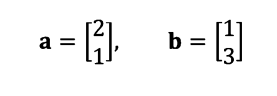

덧셈은 각 요소를 더하면 된다.

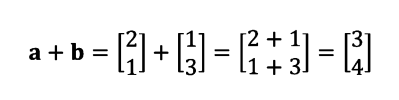

뺄셈도 마찬가지로 각 요소를 뺀다.

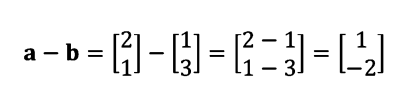


In [ ]:
a=np.array([2, 1])
b=np.array([1, 3])
print(a+b)

[3 4]


In [ ]:
print(a-b)

[ 1 -2]


###4.1.6 스칼라의 곱셈

벡터에 스칼라를 곱하면 스칼라 값이 벡터 전체에 적용된다

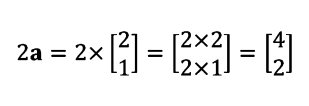

In [ ]:
print(2*a)

[4 2]


###4.1.7 내적

내적: 곱셈 연산
      
대응하는 요소들을 곱한 뒤 더한 값을 취한다.

파이썬에서는 **변수명1.dot(변수명)**로 내적을 계산한다.

In [ ]:
b=np.array([1, 3])
c=np.array([4, 2])
print(b.dot(c))

10


###4.1.8 벡터의 크기

벡터의 크기는 |와 |사이에 나타낸다.

2차원 벡터의 크기:

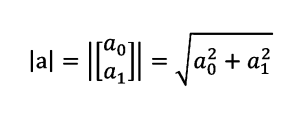

3차원 벡터의 크기:

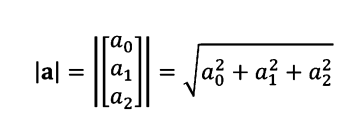

각 요소들의 제곱을 더한 뒤, 루트를 취한다.

In [ ]:
a=np.array([1, 3])
print(np.linalg.norm(a))

3.1622776601683795


#4.2 합의 기호

시그마: 합의 기호

긴 덧셈을 간결하게 나타내는 방법

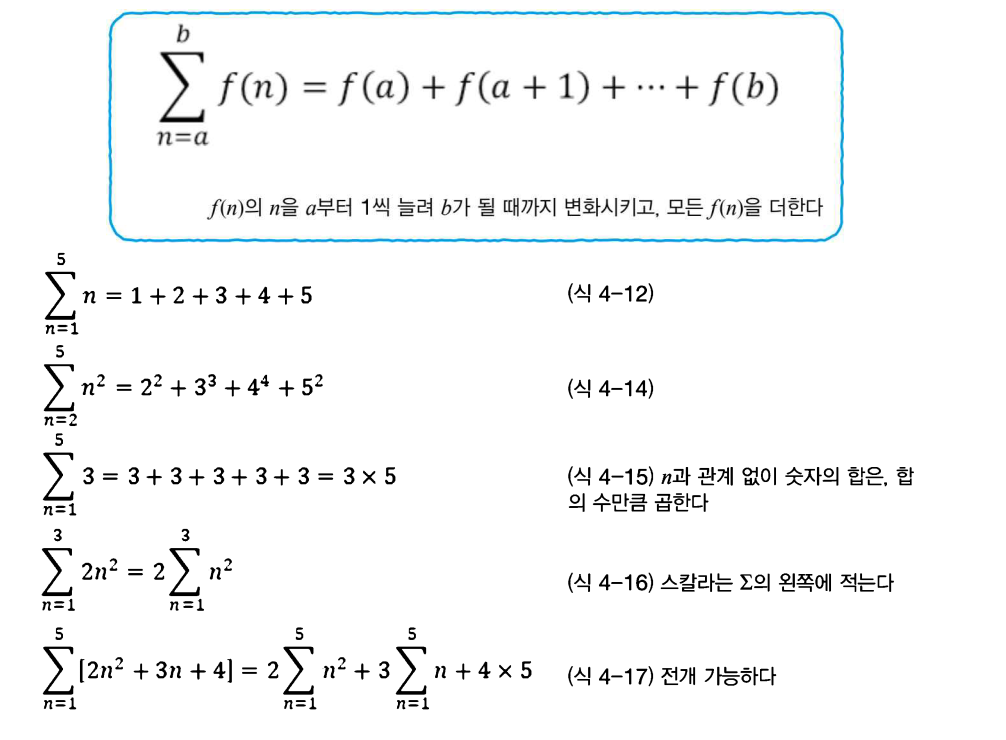



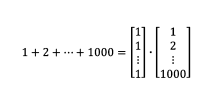

for문 없이 내적으로 계산 가능하다.

np.dot()은 가능하면 SIMD 명령이랑 캐싱에 최적화된 명령을 사용함

In [ ]:
import numpy as np
a=np.ones(1000)
b=np.arange(1, 1001)
print(a.dot(b))

500500.0


#4.3곱의 기호

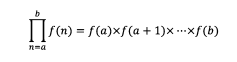



*   합의 기호와 사용법이 비슷한 곱의 기호도 있다.
*   n을 a부터 1씩 증가시켜 b가 될때까지 변화시키고 모든 값을 곱한다.



#4.4 미분


*   머신러닝은 결국 함수에서 최소나 최대인 입력을 찾는 최적화 문제
*   최소지점은 기울기가 0이 되는 성질이 있으므로 기울기를 도출하기 위해 미분을 사용

###4.4.1 다항식의 미분
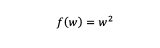 
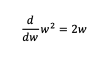
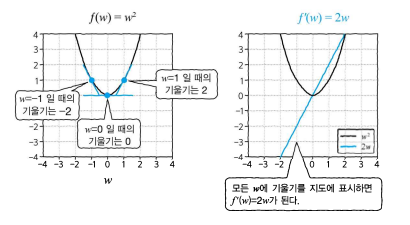

n차식의 미분 공식

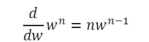



###4.4.2 미분 기호가 들어간 수식의 변형


*   미분 기호 d/dw는 오른쪽에만 작용
*   미분과 무관한 부분은 왼쪽에 나타낼 수 있음

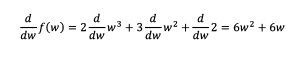



###4.4.3 중첩된 함수의 미분


*   간단하게는 g(w)를 f(w)에 대입하고 식을 전개하면 미분을 계산할 수 있음

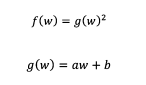

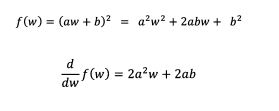


###4.4.4 중첩된 함수의 미분:연쇄 법칙


*   식이 복잡하고 전개가 힘든 경우 연쇄법칙을 쓰면 편리함

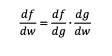



*   다음과 같이 f를 g에 대해 미분한 값과 g를 w에 대해 미분한 값을 곱하면 됨

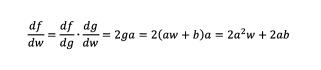



#4.5 편미분

###4.5.1 편미분이란

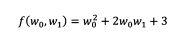



*   이 중 하나의 변수만 주목하여 다른 변수는 상수 취급하여 미분하는 것을 편미분이라고함

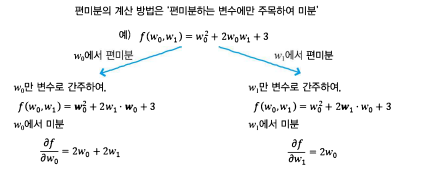


###4.5.2 편미분과 모형


*   f(w0, w1) 함수는 3차원 그래프이며, 등고선 플롯으로 나타내는 그래프가 됨

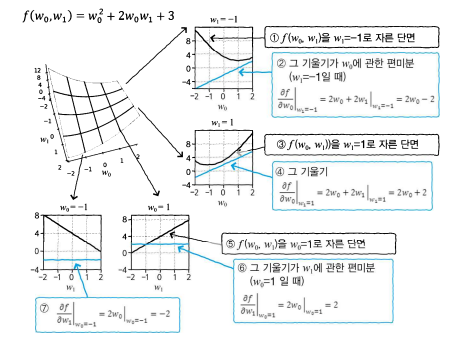





###4.5.3 경사를 그림으로 나타내기



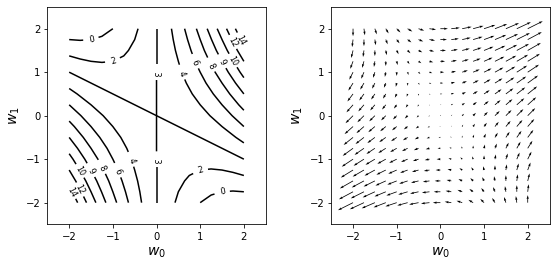

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(w0, w1):
  return w0**2 + 2*w0*w1 + 3  #(A) 함수 f=w0^2+2w0w1+3
def df_dw0(w0, w1):
  return 2*w0 + 2*w1         #(B) w0 편미분 2w0+2w1
def df_dw1(w0, w1):
  return 2*w0+0*w1           #(C) w1 편미분 2w0

w_range=2
dw=0.25
w0=np.arange(-w_range, w_range+dw, dw)
w1=np.arange(-w_range, w_range+dw, dw)
wn=w0.shape[0]

ww0, ww1 = np.meshgrid(w0, w1) # (D)의 ww0,ww1 =np.meshgrid(w0,w1)에서 격자모양으로 나눈 w0,w1을 2차원 배열 ww0과 ww1에 저장
ff = np.zeros((len(w0), len(w1)))
dff_dw0 = np.zeros((len(w0), len(w1)))
dff_dw1 = np.zeros((len(w0), len(w1)))

for i0 in range(wn): #(E) /  ww0과 ww1에 대한 f와 편미분의 값 계산 ->ff,dff_dw0,dff_dw1에 저장
    for i1 in range(wn):
        ff[i1, i0] = f(w0[i0], w1[i1])
        dff_dw0[i1, i0] = df_dw0(w0[i0], w1[i1])
        dff_dw1[i1, i0] = df_dw1(w0[i0], w1[i1])
        
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1, 2, 1)
cont = plt.contour(ww0, ww1, ff, 10, colors='k') #(F) / f=등고선표시
cont.clabel(fmt='%2.0f', fontsize=8)
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + .5)
plt.ylim(-w_range - .5, w_range + .5)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)


plt.subplot(1, 2, 2)
plt.quiver(ww0, ww1, dff_dw0, dff_dw1) #(G) / quiver의 명령을 통해 좌표점 (ww0,ww1)부터 방향(dff_dw0, dff_dw1)의 화살표를 그림 f의 경사 벡터 표시(화살표로)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + .5)
plt.ylim(-w_range - .5, w_range + .5)
plt.show()



*   왼쪽은 등고선 플롯을 나타내고 오른쪽은 지형의 경사를 나타낸다
*   화살표는 각 점에서 경사가 높은 쪽을 향하고 있다

*   경사가 가파르면 화살표가 길다
*   화살표를 따라가면 어느 지점에서 시작하더라도 그래프의 보다 높은 부분으로 진행한다

*   반대로 거꾸로 가면 지형의 낮은 부분으로 진행한다.








### 4.5.4. 다변수의 중첩 함수의 미분

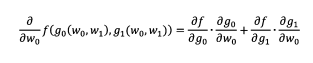

2개 이상의 함수가 중첩 될 경우

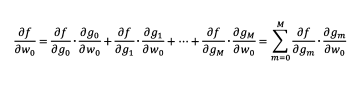


###4.5.5 합과 미분의 교환

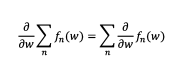

미분과 합의 기호는 순서를 바꿀 수 있다.

#4.6 행렬

###4.6.1 행렬이란


*   수직이나 수평으로 배열한 것을 벡터라 하고 가로 세로로 표처럼 늘어 놓은 것을 행렬이라고 함


*   가로 줄을 행, 세로 줄을 열이라고 함

###4.6.2 행렬의 덧셈과 뺄셈



*   행렬의 덧셈은 대응하는 요소에 연산을 수행

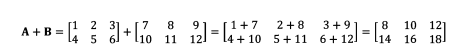
*   뺄셈도 마찬가지로 대응하는 요소를 뺌

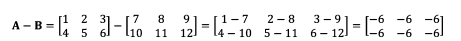





In [ ]:
A=np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [ ]:
B=np.array([[7,8,9],[10,11,12]])
print(B)

[[ 7  8  9]
 [10 11 12]]


In [ ]:
print(A+B)
print(A-B)

[[ 8 10 12]
 [14 16 18]]
[[-6 -6 -6]
 [-6 -6 -6]]


###4.6.3 스칼라 배



In [ ]:
A=np.array([[1,2,3],[4,5,6]])
print(2*A)

[[ 2  4  6]
 [ 8 10 12]]


###4.6.4 행렬의 곱

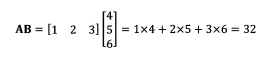



앞 행렬의 행의 수 뒷 행렬의 열의 수가 맞아야 곱할 수 있다

교환법칙은 대부분 성립하지 않는다

성립하는 경우는 곱하려는 행렬 중 하나가 단위행렬이거나 영행렬인 경우


In [ ]:
A=np.array([1,2,3])
B=np.array([4,5,6])
print(A.dot(B))

32


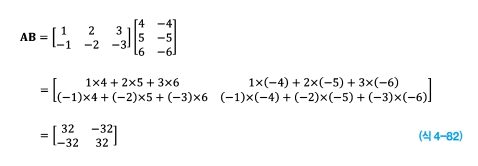

In [ ]:
A=np.array([[1,2,3],[-1,-2,-3]])
B=np.array([[4,-4],[5,-5],[6,-6]])
print(A.dot(B))

[[ 32 -32]
 [-32  32]]


###4.6.5 단위 행렬



*   대각선 성분이 1이고 그 외에는 0인 행렬




In [ ]:
print(np.identity(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
A=np.array([[1,2,3],[4,5,6],[7,8,9]])
I=np.identity(3)
print(A.dot(I))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


###4.6.6 역행렬



*   곱하면 단위 행렬이 되는 행렬

*   np.linalg.inv( )사용하면 역행렬을 구할 수 있음




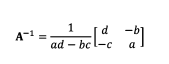




In [ ]:
A=np.array([[1,2],[3,4]])
invA=np.linalg.inv(A)
print(invA)

[[-2.   1. ]
 [ 1.5 -0.5]]


###4.6.7 전치



*   세로 벡터를 가로 벡터로, 가로 벡터를 세로 벡터

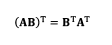



In [ ]:
A=np.array([[1,2,3],[4,5,6]])
print(A)
print(A.T)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


openGL 열 기반

directX 행 기반

###4.6.8 행렬과 연립 방정식

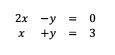

다음과 같이 행렬로 나타낼 수 있다.

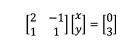

#4.7 지수 함수와 로그 함수

###4.7.1 지수

지수는 '그 수를 여러번 곱한다'는 개념

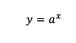

a를 밑이라고 함

a>1의 경우는 단조 증가 그래프

0<a<1의 경우는 단조 감소 그래프

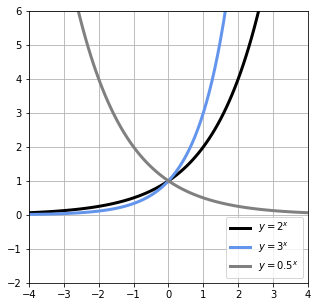

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-4, 4, 100)
y = 2**x
y2 = 3**x
y3 = 0.5**x


plt.figure(figsize=(5, 5))
plt.plot(x, y, 'black', linewidth=3, label='$y=2^x$')
plt.plot(x, y2, 'cornflowerblue', linewidth=3, label='$y=3^x$')
plt.plot(x, y3, 'gray', linewidth=3, label='$y=0.5^x$')
plt.ylim(-2, 6)
plt.xlim(-4, 4)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()




*   a>1이면 x가 증가하면 반드시 y도 증가(단조 증가 함수)
*   밑 a가 클수록 그래프는 급격히 증가



###4.7.2 로그



*   지수 함수의 역함수



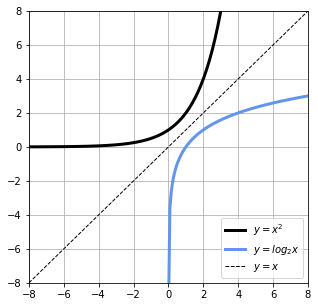

In [ ]:
x=np.linspace(-8,8,100)
y=2**x

x2 = np.linspace(0.001,8,100) #np.log(0)은 에러가 되므로 0은 포함X
y2 = np.log(x2) / np.log(2) #밑을 2로 한 log를 공식으로 계산

plt.figure(figsize=(5, 5))
plt.plot(x, y, 'black', linewidth=3,label='$y=x^2$')
plt.plot(x2, y2, 'cornflowerblue', linewidth=3, label='$y=log_2x$')
plt.plot(x, x, 'black', linestyle='--', linewidth=1, label='$y=x$')
plt.ylim(-8, 8)
plt.xlim(-8, 8)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()



*   y=x 선에서 대칭

*   로그는 곱셈을 덧셈으로 변환





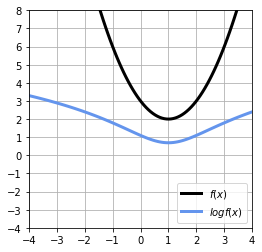

In [ ]:
x=np.linspace(-4,4,100)
y=(x-1)**2 + 2
logy=np.log(y)

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'black', linewidth=3,label='$f(x)$')
plt.plot(x, logy, 'cornflowerblue', linewidth=3,label='$logf(x)$')
plt.yticks(range(-4,9,1))
plt.xticks(range(-4,5,1))
plt.ylim(-4, 8)
plt.xlim(-4, 4)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()



*   로그는 단조 증가 함수이기 때문에 최솟값은 바뀌어도, 최솟값의 위치는 변하지 않음
*   이 성질로 인해 logf(x)를 최소화하는 x를 구하는 기법이 많이 사용됨



###4.7.3 지수 함수의 미분

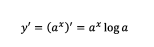

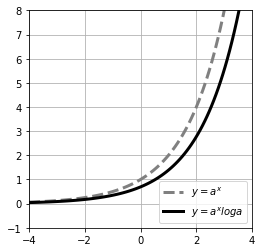

In [ ]:
x = np.linspace(-4, 4, 100)
a = 2 
y = a**x
dy = np.log(a) * y


plt.figure(figsize=(4, 4))
plt.plot(x, y, 'gray', linestyle='--', linewidth=3,label='$y=a^x$' )
plt.plot(x, dy, color='black', linewidth=3,label='$y=a^xloga$')
plt.ylim(-1, 8)
plt.xlim(-4, 4)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

a=e일 경우엔 loge=1이 되므로 미분해도 형태가 변하지 않음

###4.7.4 로그 함수의 미분

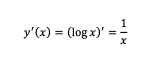


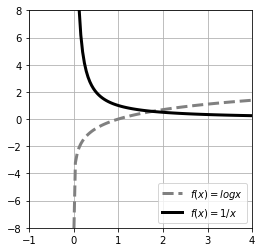

In [ ]:
x = np.linspace (0.0001, 4, 100) # 0 이하로 정의할 수 없는
y = np.log(x)
dy = 1 / x

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'gray', linestyle='--', linewidth=3, label='$f(x)=logx$')
plt.plot(x, dy, color='black', linewidth=3,label='$f(x)=1/x$')
plt.ylim(-8, 8)
plt.xlim(-1, 4)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

###4.7.5 시그모이드 함수


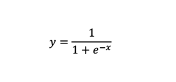



*   매끄러운 계단 같은 함수
*   음에서 양의 실수를 0에서 1 사이의 값으로 변환하기 때문에 확률을 나타낼때 자주 사용



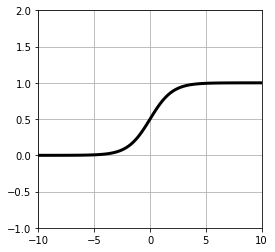

In [ ]:
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'black', linewidth=3)

plt.ylim(-1, 2)
plt.xlim(-10, 10)
plt.grid(True)
plt.show()

미분시

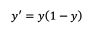

###4.7.6 소프트맥스 함수



*   대소 관계를 유지하면서, 각각의 확률을 나타내는 함수
*   확률이므로 0~1사이의 값이고 모두 더하면 1

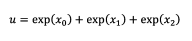

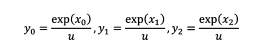


In [ ]:
def softmax(x0, x1, x2):
    u = np.exp(x0) + np.exp(x1) + np.exp(x2)
    return np.exp(x0) / u, np.exp(x1) / u, np.exp(x2) / u 

y = softmax(2, 1, -1)
print(np.round (y, 2)) #소수점 2 자리로 반올림
print(np.sum (y)) #합계

[0.71 0.26 0.04]
1.0


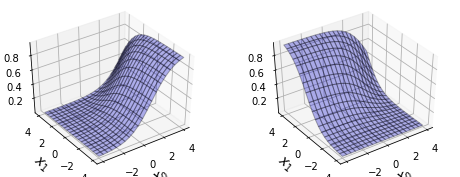

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

xn = 20
x0 = np.linspace(-4, 4, xn)
x1 = np.linspace(-4, 4, xn)

y = np.zeros((xn, xn, 3))
for i0 in range(xn):
    for i1 in range(xn):
        y[i1, i0, :] = softmax(x0[i0], x1[i1], 1) #x2만 1로 고정
                
xx0, xx1 = np.meshgrid(x0, x1)
plt.figure(figsize=(8, 3))
for i in range(2):
    ax = plt.subplot(1, 2, i + 1, projection='3d')
    ax.plot_surface(xx0, xx1, y[:, :, i],
                    rstride=1, cstride=1, alpha=0.3,
                    color='blue', edgecolor='black')
    ax.set_xlabel('$x_0$', fontsize=14)
    ax.set_ylabel('$x_1$', fontsize=14)
    ax.view_init(40, -125)
     
plt.show()

###4.7.7 소프트맥스 함수와 시그모이드 함수

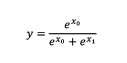

소프트맥스 함수에서 분모 분자에 e^-x0을 곱하여 정리

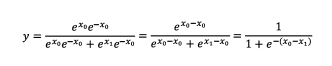

x=x0-x1로 두면 시그모이드 함수가 된다.

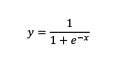

###4.7.8 가우스 함수

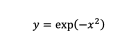



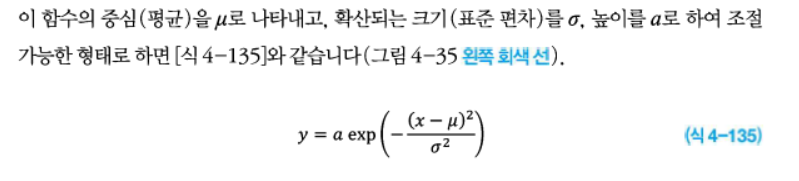

식에서 분모의 시그마 계수가 1인데 2가 되어야 맞다

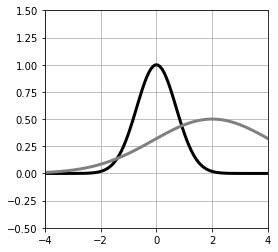

In [ ]:
def gauss(mu, sigma, a):
    return a * np.exp(-(x - mu)**2 / sigma**2)


x = np.linspace(-4, 4, 100)
plt.figure(figsize=(4, 4))
plt.plot(x, gauss(0, 1, 1), 'black', linewidth=3)
plt.plot(x, gauss(2, 3, 0.5), 'gray', linewidth=3)
plt.ylim(-.5, 1.5)
plt.xlim(-4, 4)
plt.grid(True)
plt.show()



*   가우스 함수에서 확률 분포를 나타낼 수 있다.






###4.7.9 2차원 가우스 함수

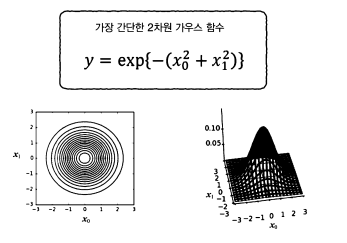

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

def gauss(x, mu, sigma):
    N, D = x.shape
    c1 = 1 / (2 * np.pi)**(D / 2)
    c2 = 1 / (np.linalg.det(sigma)**(1 / 2))
    inv_sigma = np.linalg.inv(sigma)
    c3 = x - mu
    c4 = np.dot(c3, inv_sigma)
    c5 = np.zeros(N)
    for d in range(D):
        c5 = c5 + c4[:, d] * c3[:, d]
    p = c1 * c2 * np.exp(-c5 / 2)
    return p

In [ ]:
x = np.array([[1, 2], [2, 1], [3, 4]])
mu = np.array([1, 2])
sigma = np.array([[1, 0], [0, 1]])
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]


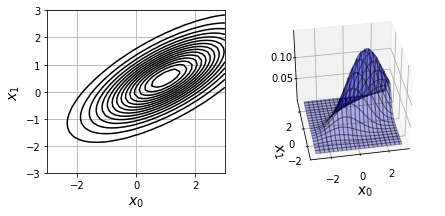

In [ ]:
X_range0=[-3,3]
X_range1=[-3,3]

#등고선 
def show_contour_gauss(mu, sig):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
    f = gauss(x, mu, sig)
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, 15, colors='k')
    plt.grid(True)

#3D 
def show3d_gauss(ax, mu, sig):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
    f = gauss(x, mu, sig)
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f,
                    rstride=2, cstride=2, alpha=0.3,
                    color='blue', edgecolor='black')
#메인 
mu = np.array([1, 0.5]) # (A)
sigma = np.array([[2, 1], [1, 1]]) # (B)
Fig = plt.figure(1, figsize=(7, 3))
Fig.add_subplot(1, 2, 1)
show_contour_gauss(mu, sigma)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
Ax = Fig.add_subplot(1, 2, 2, projection='3d')
show3d_gauss(Ax, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.show()

분포의 중심은 프로그램에서 설정한 대로 (1, 0.5)에 나타난다. 
 시그마는 치우침의 정도를 나타낸다.